<a href="https://colab.research.google.com/github/natuan310/w5-Sentiment-Classification-By-NLP-Logistic-Regression/blob/master/w5-Sentiment-Classification-By-NLP-Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Review's Sentiment Classification by Logistic Regression



This project is about classification the review about movies.

By building a Logistic Regression model to provide predictions about future reviews.

We have the data about movie reviews of IMDB, use that for training the model.


---
## 1. Prepare the data


In [1]:
from google.colab import drive
drive.mount('/ggdrive', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /ggdrive


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
# Train Data:  https://drive.google.com/open?id=1qfUh29q1BAnIz1AI5jviQZdbRFYM4FTK
# Evaluate Data:  https://drive.google.com/open?id=1loD4WoqQlmV2uGufT1NslmHLoDtlwMk1

movie = pd.read_csv('/ggdrive/My Drive/FTMLE - Tonga/Data/movie_review.csv', sep='\t')

In [4]:
movie.head()

,id,review,sentiment
0,5814_8,With all this stuff going down at the moment w...,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0
3,3630_4,It must be assumed that those who praised this...,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [6]:
sentiment = movie[['review', 'sentiment']]
sentiment

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1
...,...,...
22495,It seems like more consideration has gone into...,0
22496,I don't believe they made this film. Completel...,0
22497,"Guy is a loser. Can't get girls, needs to buil...",0
22498,This 30 minute documentary BuÃ±uel made in the...,0


---
## 2. Clean our data



In [7]:
sentiment.nunique()

review       22425
sentiment        2
dtype: int64

In [8]:
sentiment.drop_duplicates(inplace= True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22425 entries, 0 to 22499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     22425 non-null  object
 1   sentiment  22425 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 525.6+ KB


In [10]:
sentiment[sentiment['review'].isnull()]

,review,sentiment


In [11]:
sentiment[sentiment['sentiment'].isnull()]

,review,sentiment


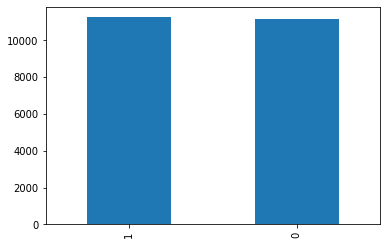

In [27]:
# Use plot to evaluate weight of each class in sentiment value
sentiment.sentiment.value_counts().plot(kind='bar')

---
#### Stopwords


Stop words are extremely common words that would be of little value in our analysis are often excluded from the vocabulary entirely.

Some common examples are determiners like the, a, an, another, but your list of stop words (or stop list) depends on the context of the problem you're working on.

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

---
#### Preprocessor


Preprocess text data to remove HTML markup, non-word character and bring the emoticons to the end of text.

In [19]:
import re

def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)

    # Remove string punctuation from text: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    text = re.sub('''[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+''', '', text)
    
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)+|\(|D|P)', text)

    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))

    return text

print(preprocessor('''We are \\almost read:))y! There is ano//ther^^ trick we can use to reduce o'''))

we are almost ready there is another trick we can use to reduce o 


---
#### Lemmatize


Use Lemmatizer to normalize all the word in the text.

In [0]:
from nltk.stem import WordNetLemmatizer

def lemmatizer(text):
    lemma = WordNetLemmatizer()
    return [lemma.lemmatize(i) for i in text.split()]



---


#### Use Vectorizer to transfrom preprocess methods to vectorize method

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = stop,
                        tokenizer = lemmatizer,
                        preprocessor = preprocessor)

---
#### Use train_test_split to split data to train and test set

In [0]:
from sklearn.model_selection import train_test_split

X = sentiment.review
y = sentiment.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

We should care about the weight of each class in train/set test.

Imbalance weight will give wrong predictions.

In [22]:
y_train.shape, y_train.sum(), y_test.shape, y_test.sum()

((15697,), 7847, (6728,), 3408)

We have almost 50-50 for each class in train and test set.

It's good to go.



---


#### Create Pipeline




Use Pipeline to apply preprocess methods to data then transfer data to our model

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(max_iter = 4000))])
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'ha', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wa', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f1a4a970f28>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function lemmatizer at 0x7f1a4a9e79d8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
               

Test model with test data set and evaluate the model

In [0]:
test_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

0.8809453032104637
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3320
           1       0.87      0.89      0.88      3408

    accuracy                           0.88      6728
   macro avg       0.88      0.88      0.88      6728
weighted avg       0.88      0.88      0.88      6728

[[2880  440]
 [ 361 3047]]


#### Load evaluate data

In [34]:
test_data = pd.read_csv('/ggdrive/My Drive/FTMLE - Tonga/Data/movie_review_evaluation.csv', sep = '\t')
test_data.head()

,id,review
0,10633_1,I watched this video at a friend's house. I'm ...
1,4489_1,`The Matrix' was an exciting summer blockbuste...
2,3304_10,This movie is one among the very few Indian mo...
3,3350_3,The script for this movie was probably found i...
4,1119_1,Even if this film was allegedly a joke in resp...


In [35]:
X_evaluate = test_data.review
X_evaluate.shape

(2500,)

In [36]:
evaluate_pred = clf.predict(X_evaluate)
evaluate_pred.shape, evaluate_pred

((2500,), array([0, 0, 1, ..., 1, 0, 1]))

In [0]:
df_evaluate_pred = pd.DataFrame(evaluate_pred)

In [38]:
df_evaluate_pred.columns = ['clf']
print(df_evaluate_pred['clf'].sum())
df_evaluate_pred

1268


,clf
0,0
1,0
2,1
3,0
4,0
...,...
2495,1
2496,0
2497,1
2498,0


In [0]:
# import pickle
# import os

# pickle.dump(clf, open(os.path.join('NLP_movie_review.pkl'), 'wb'))

In [0]:
# Use cross_val_score to test model
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
# print(scores)

---
#### Test model with list of C parameter to find the higher accuracy score

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

# C_list = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# score = 
# for i in C_list:
clf2 = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(C = 5.268269579527972, max_iter = 4000))])
clf2.fit(X_train, y_train)
pred = clf2.predict(X_test)
# score.append((i, accuracy_score(y_test, pred), confusion_matrix(y_test, pred), classification_report(y_test, pred)))
print(clf2.get_params)
print(i, accuracy_score(y_test, pred), confusion_matrix(y_test, pred), classification_report(y_test, pred), sep = '\n')

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f1a4a970f28>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 tokenizer=<function lemmatizer at 0x7f1a4a9e79d8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=5.268269579527972, class_weight=None,
                                    dual=Fal

In [0]:
score

[(0.0001, 0.5018952062430323),
 (0.0013894954943731374, 0.7645484949832776),
 (0.019306977288832496, 0.822742474916388),
 (0.2682695795279725, 0.881159420289855),
 (3.727593720314938, 0.8987736900780379),
 (51.79474679231202, 0.8847268673355629),
 (719.6856730011514, 0.8735785953177257),
 (10000.0, 0.8693422519509476)]

In [0]:
score2

[(0.2682695795279725, 0.881159420289855),
 (10.268269579527972, 0.8958751393534002),
 (20.268269579527974, 0.8907469342251951),
 (30.268269579527974, 0.8876254180602007),
 (40.268269579527974, 0.8847268673355629),
 (50.268269579527974, 0.8845039018952062)]

In [0]:
score3

[(0.2682695795279725, 0.881159420289855),
 (5.268269579527972, 0.8972129319955406)]

---
#### Apply best C parameter to model

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf2 = Pipeline([('vect', tfidf),
                    ('clf', LogisticRegression(C= 3.727593720314938, max_iter=4000))])
clf2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f1a4a970f28>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 tokenizer=<function lemmatizer at 0x7f1a4a9e79d8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=3.727593720314938, class_weight=None,
                                    dual=False, fit_intercept=True,
             

Predict with new model and check model scores

In [41]:
test_pred = clf2.predict(X_test)
print(accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

0.8861474435196195
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3320
           1       0.88      0.90      0.89      3408

    accuracy                           0.89      6728
   macro avg       0.89      0.89      0.89      6728
weighted avg       0.89      0.89      0.89      6728

[[2906  414]
 [ 352 3056]]


Use model clf2 predict the evaluate data

In [0]:
evaluate_pred2 = clf2.predict(X_evaluate)
evaluate_pred2.shape, evaluate_pred2

((2500,), array([0, 0, 1, ..., 1, 0, 1]))

Create model clf3 with other C value

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf3 = Pipeline([('vect', tfidf),
                    ('clf', LogisticRegression(C= 3.727593720314938, max_iter=4000))])
clf3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f04164a3048>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 tokenizer=<function tokenizer_porter at 0x7f04164a3378>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=3.727593720314938, class_weight=None,
                                    dual=False, fit_intercept=True,
       

In [0]:
test_pred = clf3.predict(X_test)
print(accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

0.8878483835005574
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2185
           1       0.88      0.90      0.89      2300

    accuracy                           0.89      4485
   macro avg       0.89      0.89      0.89      4485
weighted avg       0.89      0.89      0.89      4485

[[1913  272]
 [ 231 2069]]


Use model clf3 predict the evaluate data

In [0]:
evaluate_pred3 = clf3.predict(X_evaluate)
evaluate_pred3.shape, evaluate_pred3

((2500,), array([0, 0, 1, ..., 1, 0, 1]))

Train model clf2 again with whole labeled data

In [0]:
clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f04164a3048>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 tokenizer=<function tokenizer_porter at 0x7f04164a3378>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=5.268269579527972, class_weight=None,
                                    dual=False, fit_intercept=True,
       

In [0]:
test_pred = clf2.predict(X_test)
print(accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

0.966778149386845
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2185
           1       0.97      0.97      0.97      2300

    accuracy                           0.97      4485
   macro avg       0.97      0.97      0.97      4485
weighted avg       0.97      0.97      0.97      4485

[[2106   79]
 [  70 2230]]


Use re-train model clf2 to predict the evaluate data

In [0]:
evaluate_pred4 = clf2.predict(X_evaluate)
evaluate_pred4.shape, evaluate_pred4

((2500,), array([0, 0, 1, ..., 1, 0, 1]))

Compare different between predictions of models

In [0]:
# Have remove_stopwords
df_evaluate_pred['clf2'] = pd.Series(evaluate_pred2)
df_evaluate_pred['clf3'] = pd.Series(evaluate_pred3)
df_evaluate_pred['clf2 re-train'] = pd.Series(evaluate_pred4)
df_evaluate_pred.sum()

clf              1282
clf2             1268
clf3             1276
clf2 re-train    1270
dtype: int64

Try re-train model clf with the whole labeled data

In [0]:
clf.fit(X, y)
pred5 = clf.predict(X_test)
print(accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))
print(confusion_matrix(y_test, pred5))

0.9237458193979933
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2185
           1       0.92      0.93      0.93      2300

    accuracy                           0.92      4485
   macro avg       0.92      0.92      0.92      4485
weighted avg       0.92      0.92      0.92      4485

[[1998  187]
 [ 155 2145]]


The precision score is lower than the re-train clf2

---
Add predictions to evaluate data and export the result


In [0]:
test_data['sentiment'] = df_evaluate_pred['clf2 re-train']
test_data.to_csv('AnhTuan.csv')

In [0]:
test_data.sample(10)

,id,review,sentiment
1902,1167_4,I really tried to like this movie but in the e...,0
1816,8727_2,Let me start out by saying I can enjoy just ab...,0
2473,4665_10,I first saw this film about 11 years ago when ...,1
1439,3287_1,"If this movie should be renamed, it should be ...",0
1793,10439_8,When I saw this movie in the theater when it c...,1
1806,3747_2,I love all his work but this looks like nothin...,0
2454,7065_2,OK well i found this movie in my dads old pile...,0
2210,3949_8,"Like many people on this site, I saw this movi...",1
1275,2525_2,"This movie was, as Homer Simpson would have pu...",0
628,4089_1,Warning: This review contains a spoiler.<br />...,0


In [0]:
import pickle
import os

pickle.dump(clf2, open(os.path.join('NLP_movie_review_90.pkl'), 'wb'))



---





---

